# Import Packages 

In [158]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
style.use('fivethirtyeight')
%matplotlib inline

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# just for the sake of this blog post!
from warnings import filterwarnings
filterwarnings('ignore')

# Data Collection 

In [159]:
# load the provided data
train_features = pd.read_csv('dengue_features_train.csv',
                             index_col=[0,1,2])

train_labels = pd.read_csv('dengue_labels_train.csv',
                           index_col=[0,1,2])

test_features = pd.read_csv('dengue_features_test.csv', index_col=[0,1,2])

In [160]:
# Seperate data for San Juan
sj_train_features = train_features.loc['sj']
sj_test_features = test_features.loc['sj']
sj_train_labels = train_labels.loc['sj']

# Separate data for Iquitos
iq_train_features = train_features.loc['iq']
iq_test_features = test_features.loc['iq']
iq_train_labels = train_labels.loc['iq']

In [161]:
# Remove `week_start_date` string.
sj_train_features.drop('week_start_date', axis=1, inplace=True)
iq_train_features.drop('week_start_date', axis=1, inplace=True)
sj_test_features.drop('week_start_date', axis=1, inplace=True)
iq_test_features.drop('week_start_date', axis=1, inplace=True)

In [162]:
sj_train_features.fillna(method='ffill', inplace=True)
iq_train_features.fillna(method='ffill', inplace=True)
sj_test_features.fillna(method='ffill', inplace=True)
iq_test_features.fillna(method='ffill', inplace=True)

In [163]:
print('San Juan')
print('features: ', sj_train_features.shape)
print('labels  : ', sj_train_labels.shape)

print('\nIquitos')
print('features: ', iq_train_features.shape)
print('labels  : ', iq_train_labels.shape)

San Juan
features:  (936, 20)
labels  :  (936, 1)

Iquitos
features:  (520, 20)
labels  :  (520, 1)


Text(0.5, 0, 'Time')

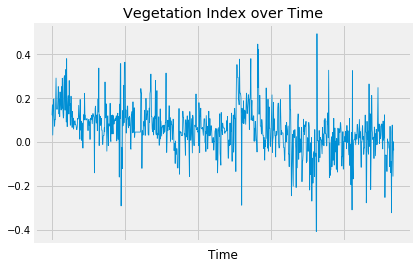

In [164]:
(sj_train_features
     .ndvi_ne
     .plot
     .line(lw=0.8))

plt.title('Vegetation Index over Time')
plt.xlabel('Time')

In [165]:
def preprocess_data(data_path, labels_path=None):
    # load data and set index to city, year, weekofyear
    df = pd.read_csv(data_path, index_col=[0, 1, 2])
    
    # select features we want
    features = ['reanalysis_specific_humidity_g_per_kg', 
                 'reanalysis_dew_point_temp_k', 
                 'station_avg_temp_c', 
                 'station_min_temp_c']
    df = df[features]
    
    # fill missing values
    df.fillna(method='ffill', inplace=True)

    # add labels to dataframe
    if labels_path:
        labels = pd.read_csv(labels_path, index_col=[0, 1, 2])
        df = df.join(labels)
    
    # separate san juan and iquitos
    sj = df.loc['sj']
    iq = df.loc['iq']
    
    return sj, iq

# Linear Regression 

# SJ 

In [166]:
X_train, X_test, y_train, y_test = train_test_split(sj_train_features, sj_train_labels, random_state = 101, shuffle = False)


In [167]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [168]:
predictions_sj = lm.predict(X_test)

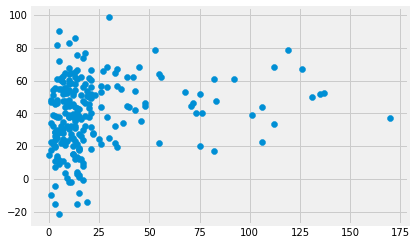

In [169]:
plt.scatter(y_test,predictions_sj)

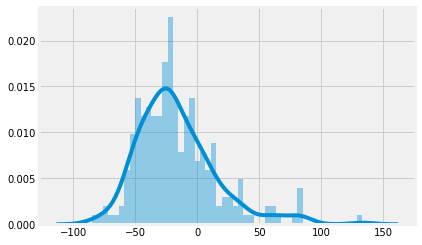

In [170]:
sns.distplot((y_test-predictions_sj),bins=50);

In [171]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,predictions_sj))

MAE: 29.79442801898445


In [172]:
predictions_real_sj = lm.predict(sj_test_features)
predictions_real_sj.shape

(260, 1)

# IQ 

In [199]:
X_train, X_test, y_train, y_test = train_test_split(iq_train_features, iq_train_labels, random_state = 101, shuffle = False)

In [200]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [201]:
predictions_iq = lm.predict(X_test)

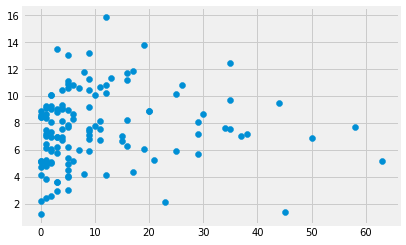

In [202]:
plt.scatter(y_test,predictions_iq)

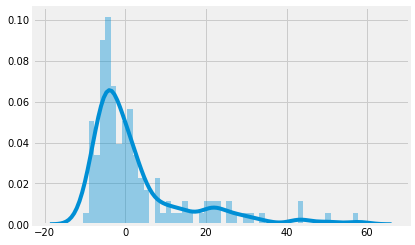

In [203]:
sns.distplot((y_test-predictions_iq),bins=50);

In [204]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,predictions_iq))

MAE: 8.118096133413625


In [205]:
predictions_real_iq = lm.predict(iq_test_features)
predictions_real_sj.shape

(260, 1)

## SJ Regularisation 

In [206]:
X_train, X_test, y_train, y_test = train_test_split(sj_train_features, sj_train_labels, random_state = 101, shuffle = False)

In [207]:
# from sklearn import linear_model
clf_l1 = linear_model.Lasso(alpha=0.5)
clf_l1.fit(X_train, y_train)
Y_pred = clf_l1.predict(X_test)
metrics.mean_absolute_error(y_test, Y_pred)

24.01090260215015

In [208]:
clf_l2 = linear_model.Ridge(alpha = 44)
clf_l2.fit(X_train, y_train)
Y_pred = clf_l2.predict(X_test)
metrics.mean_absolute_error(y_test, Y_pred)

24.431167191363397

In [209]:
predictions_reg_sj = clf_l1.predict(sj_test_features)
predictions_reg_sj.shape

(260,)

## IQ Regularisation 

In [210]:
X_train, X_test, y_train, y_test = train_test_split(iq_train_features, iq_train_labels, random_state = 101, shuffle = False)

In [211]:
# from sklearn import linear_model
clf_l1 = linear_model.Lasso(alpha=0.5)
clf_l1.fit(X_train, y_train)
Y_pred = clf_l1.predict(X_test)
metrics.mean_absolute_error(y_test, Y_pred)

8.229982028786782

In [212]:
X_train.shape

(390, 20)

In [213]:
clf_l2 = linear_model.Ridge(alpha = 44)
clf_l2.fit(X_train, y_train)
Y_pred = clf_l2.predict(X_test)
metrics.mean_absolute_error(y_test, Y_pred)

8.247680719980051

In [214]:
predictions_reg_iq = clf_l1.predict(iq_test_features)
predictions_reg_iq.shape

(156,)

In [215]:
submission = pd.read_csv("submission_format.csv",
                         index_col=[0, 1, 2])
submission.total_cases = np.concatenate([predictions_reg_sj.astype(int).round(), predictions_reg_iq.astype(int).round()])
submission.to_csv("submission5.csv")